In [71]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [4]:
#  Import and read the charity_data.csv.
import pandas as pd
retail_df = pd.read_csv(r"C:\Users\jariv\Project4\online_retail.csv")
retail_df.head()

C:\Users\jariv\AppData\Local\Temp\ipykernel_8200\1313707847.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  retail_df = pd.read_csv(r"C:\Users\jariv\Project4\online_retail.csv")


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/10 8:26,4.25,17850.0,United Kingdom
1,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/10 8:26,7.65,17850.0,United Kingdom
2,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
3,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom


<Axes: xlabel='count', ylabel='Country'>

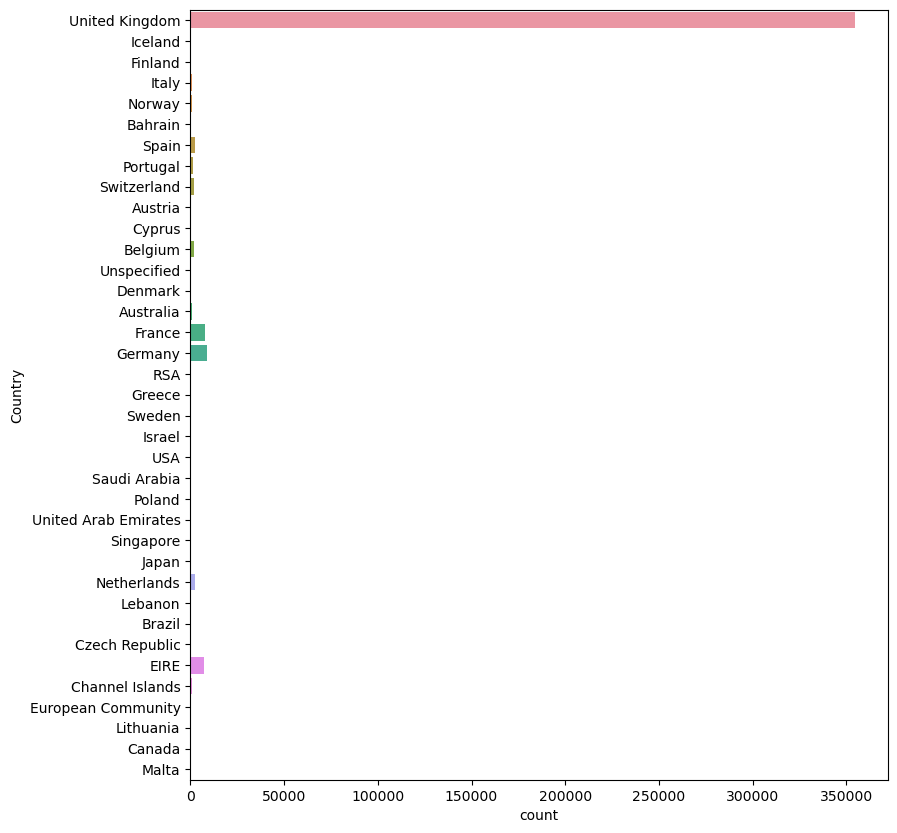

In [51]:
# Make figsize
plt.figure(figsize=(9,10))

# Bar plot by country
sns.countplot(y='Country', data=retail_df)

In [5]:
# Calculating the Missing Values % contribution in DF

df_null = round(100*(retail_df.isnull().sum())/len(retail_df), 2)
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [6]:
# Droping rows having missing values

retail_df = retail_df.dropna()
retail_df.shape

(406829, 8)

In [7]:
# Drop rows with "POST" in the StockCode column
retail_df = retail_df[retail_df['StockCode'] != 'POST']

# Drop rows where InvoiceNo column starts with "C"
retail_df = retail_df[~retail_df['InvoiceNo'].astype(str).str.startswith('C')]

In [8]:
from datetime import date
retail_df['CustomerID'] = retail_df['CustomerID'].astype(str)

# Convert 'InvoiceDate' column to datetime data type
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'])

# Verify the data types of the DataFrame
retail_df.info()

C:\Users\jariv\AppData\Local\Temp\ipykernel_8200\185447101.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'])


<class 'pandas.core.frame.DataFrame'>
Index: 396825 entries, 0 to 532617
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    396825 non-null  object        
 1   StockCode    396825 non-null  object        
 2   Description  396825 non-null  object        
 3   Quantity     396825 non-null  int64         
 4   InvoiceDate  396825 non-null  datetime64[ns]
 5   UnitPrice    396825 non-null  float64       
 6   CustomerID   396825 non-null  object        
 7   Country      396825 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 27.2+ MB


In [9]:
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'], format = '%m/%d/%Y %H:%M')

<Axes: xlabel='Frequency', ylabel='Description'>

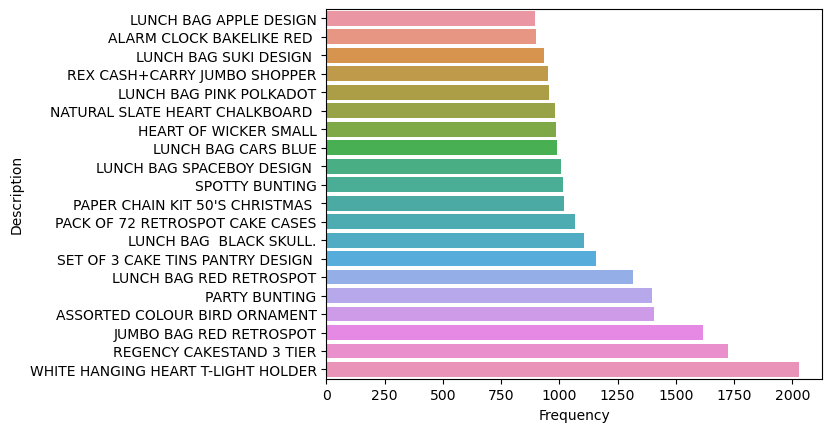

In [69]:
# Get the top 25 most frequent descriptions
top_20_descriptions = retail_df['Description'].value_counts().index[:20]

# Filter the DataFrame to include only rows with descriptions in the top 25
top_20_df = retail_df[retail_df['Description'].isin(top_20_descriptions)]

# Sort the DataFrame by description frequency in ascending order
top_20_df = top_20_df.groupby('Description').size().reset_index(name='Frequency')
top_20_df = top_20_df.sort_values(by='Frequency')

# Bar plot of the top 25 most frequent descriptions in ascending order
sns.barplot(y='Description', x='Frequency', data=top_20_df)

In [70]:
# Get the top 20 most frequent descriptions
top_20_descriptions = retail_df['Description'].value_counts().nlargest(20).index

# Filter the DataFrame to include only rows with descriptions in the top 20
top_20_df = retail_df[retail_df['Description'].isin(top_20_descriptions)]

# Count occurrences of each description
description_counts = top_20_df['Description'].value_counts()

# Create DataFrame with frequencies
top_20_df = description_counts.reset_index()
top_20_df.columns = ['Description', 'Frequency']

# Sort the DataFrame by frequency
top_20_df = top_20_df.sort_values(by='Frequency')

# Create an interactive bar plot with Plotly
fig = px.bar(top_20_df, x='Frequency', y='Description', orientation='h', title='Top 20 Most Frequent Descriptions')
fig.update_layout(xaxis_title='Frequency', yaxis_title='Description')
fig.show()

C:\Users\jariv\AppData\Local\Temp\ipykernel_8200\827016311.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\jariv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\jariv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



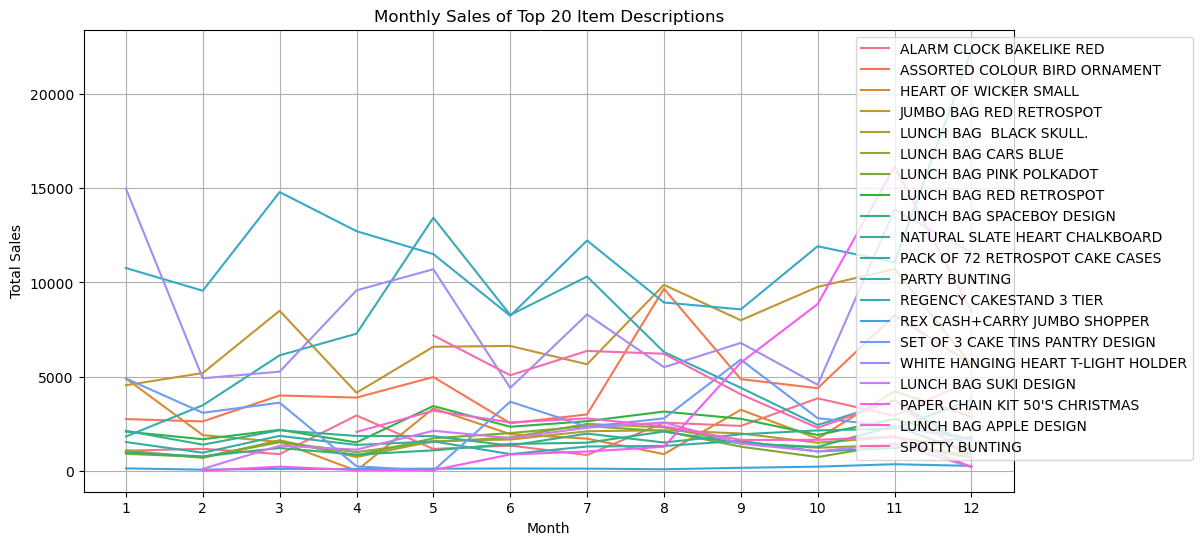

In [65]:
# Get the top 25 most frequent item descriptions
top_20_descriptions = retail_df['Description'].value_counts().nlargest(20).index

# Filter the DataFrame to include only rows with the top 25 descriptions
top_20_df = retail_df[retail_df['Description'].isin(top_20_descriptions)]

# Extract month from InvoiceDate
top_20_df['Month'] = top_20_df['InvoiceDate'].dt.month

# Group by month and item description, then sum up 'TotalPrice' for each month
monthly_sales = top_20_df.groupby(['Month', 'Description'])['TotalPrice'].sum().reset_index()

# Plot the sales of top 25 item descriptions based on months
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='TotalPrice', hue='Description', data=monthly_sales)
plt.title('Monthly Sales of Top 20 Item Descriptions')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.xticks(range(1, 13))  # Set the x-axis ticks to show all months
plt.grid(True)
plt.show()

In [66]:
import plotly.express as px

# Get the top 25 most frequent item descriptions
top_20_descriptions = retail_df['Description'].value_counts().nlargest(20).index

# Filter the DataFrame to include only rows with the top 25 descriptions
top_20_df = retail_df[retail_df['Description'].isin(top_20_descriptions)]

# Extract month from InvoiceDate
top_20_df['Month'] = top_20_df['InvoiceDate'].dt.month

# Group by month and item description, then sum up 'Quantity' for each month
monthly_quantity = top_20_df.groupby(['Month', 'Description'])['Quantity'].sum().reset_index()

# Create an interactive line plot using Plotly
fig = px.line(monthly_quantity, x='Month', y='Quantity', color='Description', title='Monthly Quantity of Top 20 Item Descriptions')
fig.update_layout(
    xaxis=dict(title='Month'),
    yaxis=dict(title='Quantity'),
    legend_title='Description'
)
fig.show()

C:\Users\jariv\AppData\Local\Temp\ipykernel_8200\1977119150.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



c:\Users\jariv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\jariv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\jariv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\jariv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\jariv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a

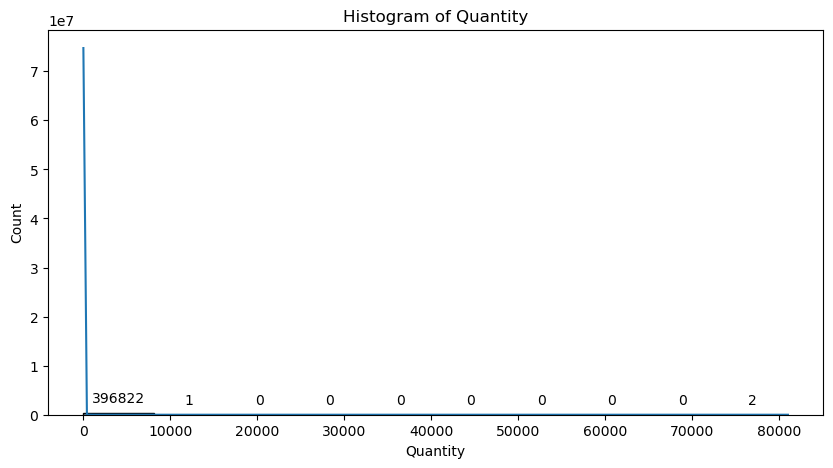

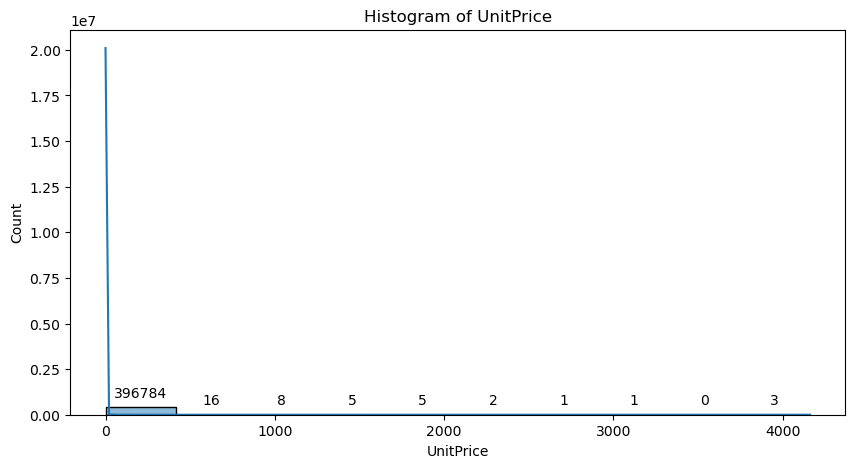

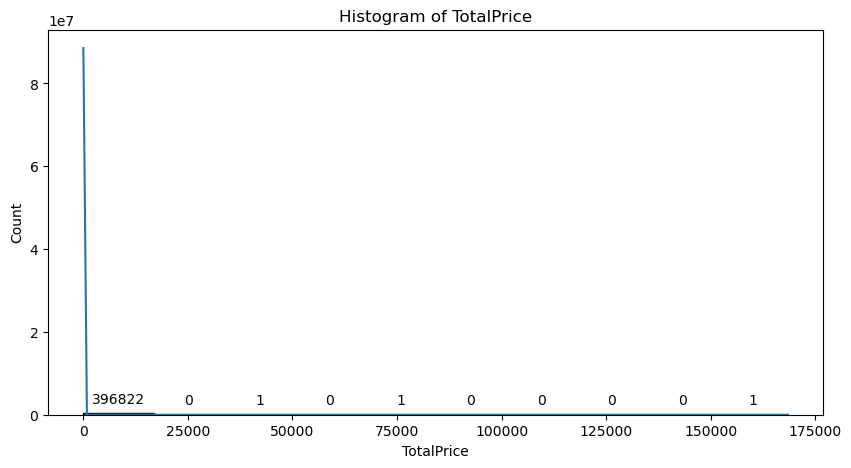

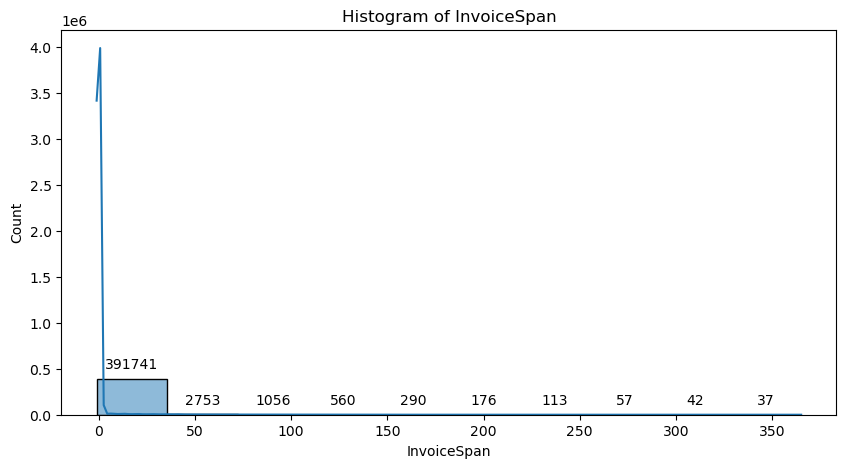

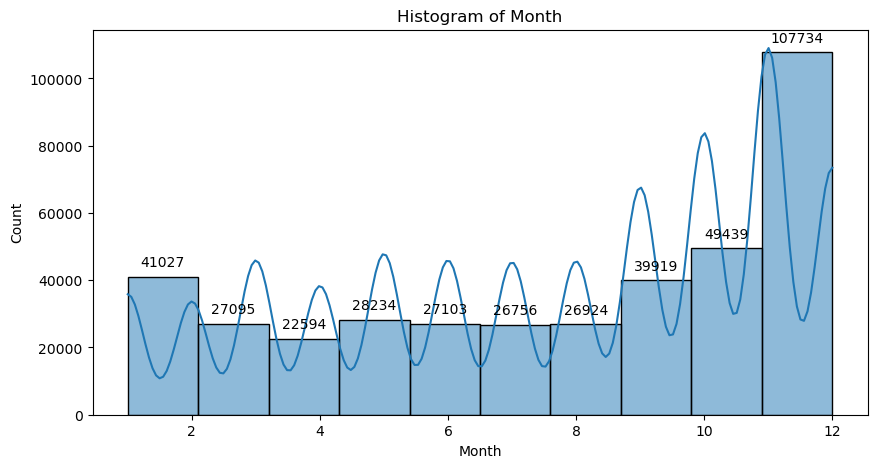

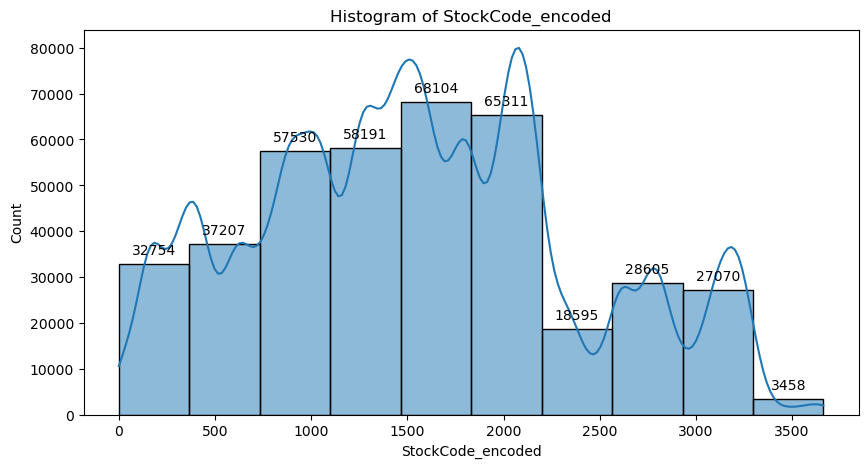

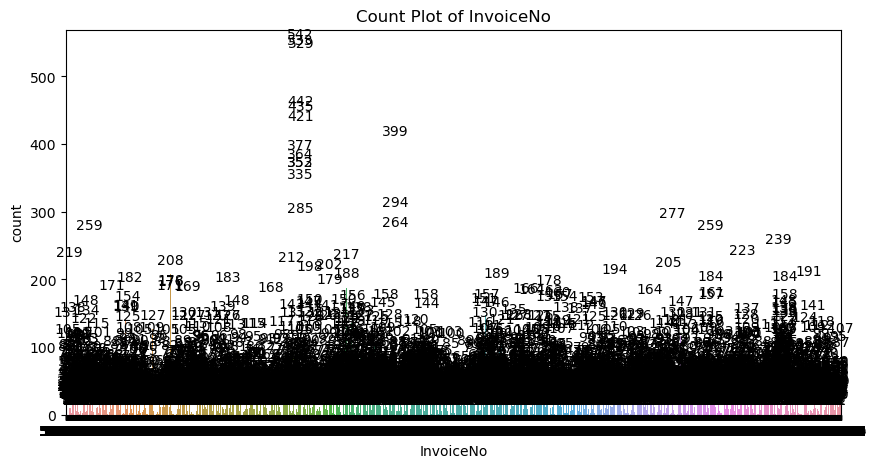

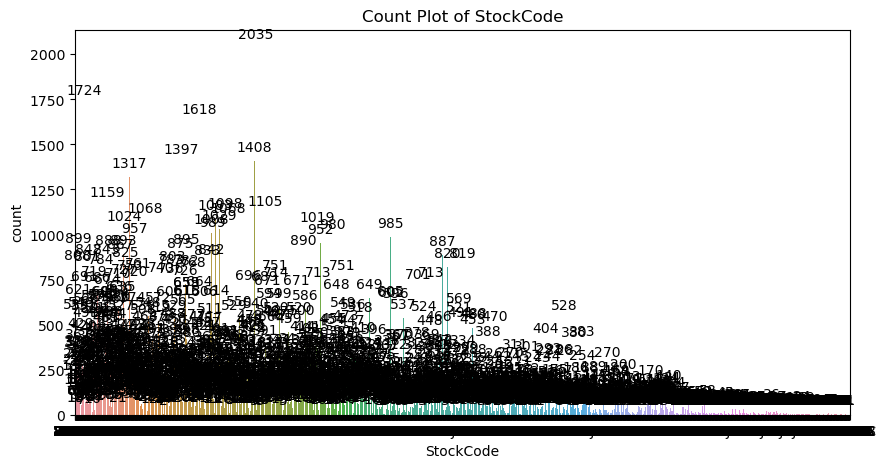

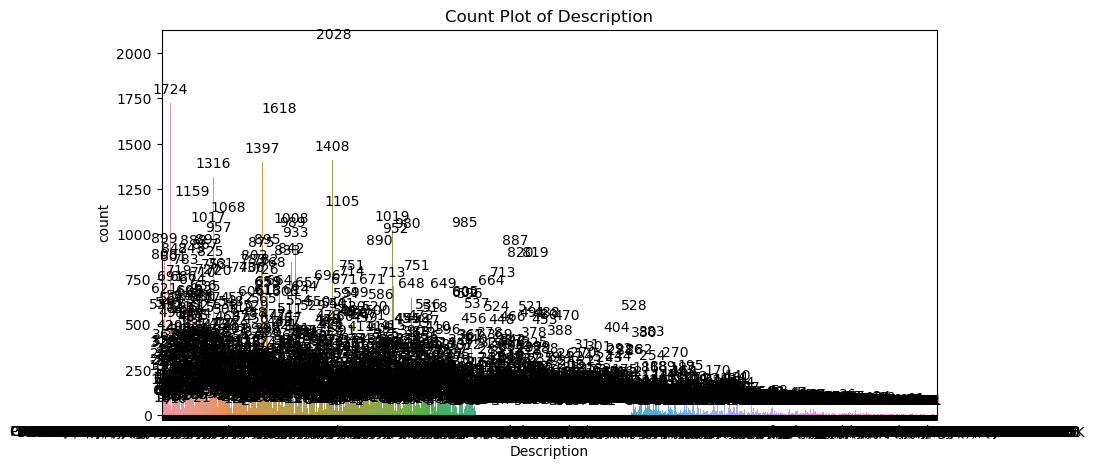

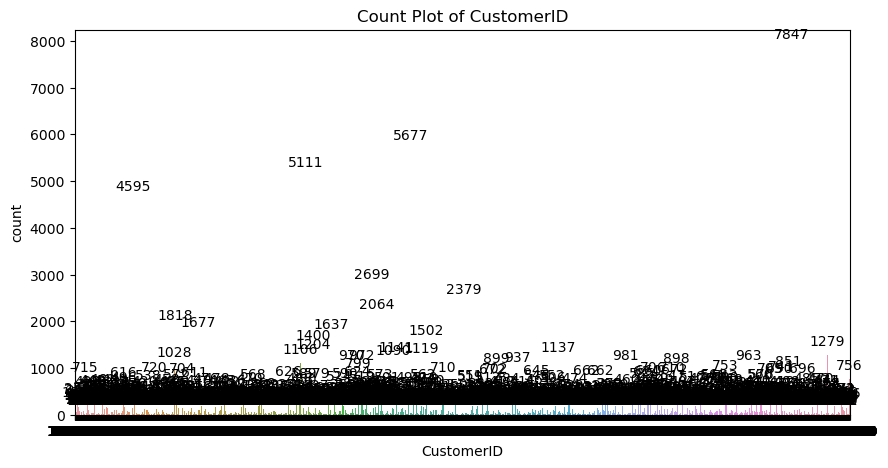

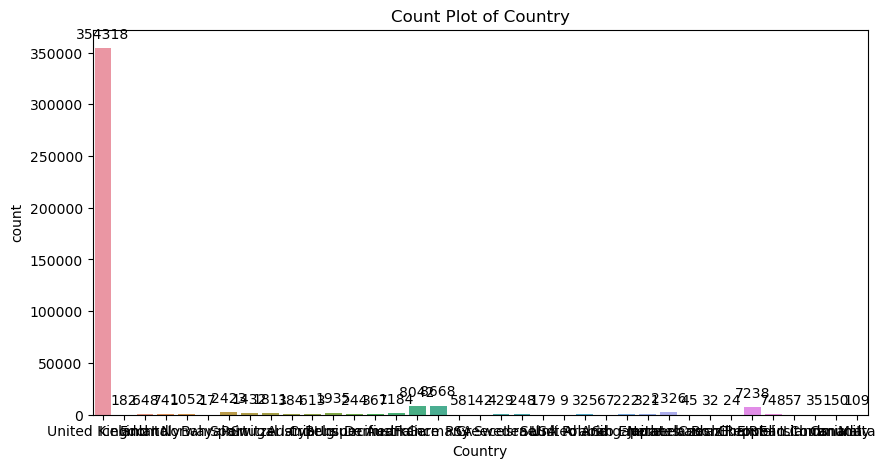

In [87]:
for col in retail_df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=retail_df, x=col, bins=10, kde=True)
    plt.title(f'Histogram of {col}')
    
    # Annotating histograms with counts
    for p in plt.gca().patches:
        plt.gca().annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 10), 
                    textcoords='offset points')

# Plot count plots for object columns
for col in retail_df.select_dtypes(include=['object']).columns:
    plt.figure( figsize=(10, 5))
    sns.countplot(data=retail_df, x=col)
    plt.title(f'Count Plot of {col}')
    
    # Annotating count plots with counts
    for p in plt.gca().patches:
        plt.gca().annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 10), 
                    textcoords='offset points')

In [102]:
# Perform one-hot encoding for the 'StockCode' column
retail_df_encoded = pd.get_dummies(retail_df, columns=['StockCode'], prefix='StockCode')

In [103]:
# Convert 'InvoiceDate' column to datetime format if it's not already
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'])

# Extract month from 'InvoiceDate' and create a new column
retail_df['InvoiceMonth'] = retail_df['InvoiceDate'].dt.month

# Display the DataFrame with the new 'InvoiceMonth' column
print(retail_df.head())

      InvoiceNo StockCode                     Description  Quantity  \
60580    541431     23166  MEDIUM CERAMIC TOP STORAGE JAR     74215   
14761    537626     20780       BLACK EAR MUFF HEADPHONES        12   
14762    537626     20782  CAMOUFLAGE EAR MUFF HEADPHONES         6   
14763    537626     21064           BOOM BOX SPEAKER BOYS         6   
14764    537626     21171            BATHROOM METAL SIGN         12   

      InvoiceDate  UnitPrice CustomerID         Country  TotalPrice  \
60580  2011-01-18       1.04    12346.0  United Kingdom    77183.60   
14761  2010-12-07       4.65    12347.0         Iceland       55.80   
14762  2010-12-07       5.49    12347.0         Iceland       32.94   
14763  2010-12-07       5.95    12347.0         Iceland       35.70   
14764  2010-12-07       1.45    12347.0         Iceland       17.40   

       InvoiceSpan  Month  StockCode_encoded  InvoiceMonth  
60580         -1.0      1                NaN             1  
14761         -1.0     1

In [111]:
# Select features and target variable
X = retail_df[['CustomerID', 'TotalPrice']]  # Features: CustomerID, TotalPrice
y = retail_df['Quantity']  # Target variable: Quantity

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 8.354048846890748


In [104]:
# Data preprocessing and feature engineering
# Assuming retail_df is your DataFrame with columns: 'InvoiceDate', 'StockCode', 'Quantity'
retail_df['InvoiceMonth'] = pd.to_datetime(retail_df['InvoiceMonth'])
retail_df['InvoiceMonth'] = retail_df['InvoiceMonth'].dt.date
sales_per_date = retail_df.groupby('InvoiceMonth')['Quantity'].sum().reset_index()

# Train-test split (preserve temporal order)
train_size = int(0.8 * len(sales_per_date))
train_data = sales_per_date[:train_size]
test_data = sales_per_date[train_size:]

# Feature and target variables
X_train = train_data[['InvoiceMonth']]  # Features: Date
y_train = train_data['Quantity']  # Target: Sales quantity
X_test = test_data[['InvoiceMonth']]  # Features: Date
y_test = test_data['Quantity']  # Target: Sales quantity

# Model training (linear regression)
model = LinearRegression()
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Prediction (for future dates)
future_dates = pd.date_range(start='2024-01-01', end='2024-12-31')
future_dates_df = pd.DataFrame({'InvoiceMonth': future_dates})
future_predictions = model.predict(future_dates_df[['InvoiceMonth']])

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by LinearRegression.

In [105]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'StockCode' and populate 'StockCode_encoded' column
retail_df['StockCode_encoded'] = label_encoder.fit_transform(retail_df['StockCode'])

# Verify the encoding
print(retail_df[['StockCode', 'StockCode_encoded']].head())

      StockCode  StockCode_encoded
60580     23166               1997
14761     20780                206
14762     20782                208
14763     21064                332
14764     21171                394


In [107]:
print(X_train.shape)
print(y_test)

(0, 1)
0    5178576
Name: Quantity, dtype: int64


In [110]:
print(X_train)
print(y_test)

Empty DataFrame
Columns: [InvoiceMonth]
Index: []
0    5178576
Name: Quantity, dtype: int64


In [ ]:
p

In [10]:
# Determine the frequency of CustomerID
customer_frequency = retail_df['CustomerID'].value_counts()

# Display the frequency
print(customer_frequency)

CustomerID
17841.0    7847
14911.0    5677
14096.0    5111
12748.0    4595
14606.0    2699
           ... 
17923.0       1
15389.0       1
14576.0       1
16078.0       1
17102.0       1
Name: count, Length: 4339, dtype: int64


In [11]:
# Create a new DataFrame from the frequency Series
customer_frequency_df = pd.DataFrame(customer_frequency)
customer_frequency_df.reset_index(inplace=True)
customer_frequency_df.columns = ['CustomerID', 'CustFrequency']

# Display the new DataFrame
print(customer_frequency_df.head())

  CustomerID  CustFrequency
0    17841.0           7847
1    14911.0           5677
2    14096.0           5111
3    12748.0           4595
4    14606.0           2699


In [37]:
# count the number of unique invoice numbers for each customer
Invoicefrequency = retail_df.groupby('CustomerID')['InvoiceNo'].nunique()
Invoicefrequency


CustomerID
12346.0     1
12347.0     7
12348.0     4
12349.0     1
12350.0     1
           ..
18280.0     1
18281.0     1
18282.0     2
18283.0    16
18287.0     3
Name: InvoiceNo, Length: 4339, dtype: int64

In [44]:

# Group by CustomerID and InvoiceNo, then count the occurrences of each combination
invoice_frequency = retail_df.groupby(['CustomerID', 'InvoiceNo']).size().reset_index(name='InvoiceFrequency')

# Display the DataFrame
print(invoice_frequency[['CustomerID', 'InvoiceNo', 'InvoiceFrequency']])

      CustomerID InvoiceNo  InvoiceFrequency
0        12346.0    541431                 1
1        12347.0    537626                31
2        12347.0    542237                29
3        12347.0    549222                24
4        12347.0    556201                18
...          ...       ...               ...
18479    18283.0    579673                52
18480    18283.0    580872                50
18481    18287.0    554065                29
18482    18287.0    570715                38
18483    18287.0    573167                 3

[18484 rows x 3 columns]


In [45]:
Invoicefrequency_df = pd.DataFrame(Invoicefrequency)
Invoicefrequency_df.reset_index(inplace=True)
Invoicefrequency_df.columns = ['CustomerID', 'InvoiceFrequency']
Invoicefrequency_df.head()

,CustomerID,InvoiceFrequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


In [76]:
Invoicefrequency_df.columns

Index(['CustomerID', 'InvoiceFrequency'], dtype='object')

In [75]:
# Split data into features (X) and target variable (y)
X = Invoicefrequency_df.drop(['InvoiceNo'], axis=1)
y = Invoicefrequency_df['InvoiceNo']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

KeyError: "['InvoiceNo'] not found in axis"

In [46]:
# count the number of unique invoice numbers for each customer
StockCodefreq = retail_df['CustomerID'].value_counts()


In [47]:
StockCodefreq_df = pd.DataFrame(StockCodefreq)
StockCodefreq_df.reset_index(inplace=True)
StockCodefreq_df.columns = ['CustomerID', 'StockCodeFreq']
StockCodefreq_df.head()

,CustomerID,StockCodeFreq
0,17841.0,7847
1,14911.0,5677
2,14096.0,5111
3,12748.0,4595
4,14606.0,2699


In [16]:
#add new column Total Price
retail_df['TotalPrice'] = retail_df['Quantity'] * retail_df['UnitPrice']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50
1,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30
2,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
3,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [83]:
# Perform one-hot encoding for categorical variables
X = pd.get_dummies(X, columns=['CustomerID', 'StockCode', 'Description'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
# Display unique values in the 'StockCode' column
print(retail_df['StockCode'].unique())

['23166' '20780' '20782' ... '84613C' '84206B' '21414']


In [84]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode StockCode as categorical variable
retail_df['StockCode_encoded'] = label_encoder.fit_transform(retail_df['StockCode'].astype(str))

# Split data into features (X) and target variable (y)
X = retail_df.drop(['Quantity'], axis=1)  # Assuming 'Quantity' is the target variable
y = retail_df['Quantity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

ValueError: could not convert string to float: '46000R'

In [17]:
#Calculate the total purchase amount for each customer
total_purchase_amount = retail_df['TotalPrice'].value_counts()
total_purchase_amount_df = pd.DataFrame(total_purchase_amount)
total_purchase_amount_df.reset_index(inplace=True)
total_purchase_amount_df.columns = ['CustomerID', 'TotalPrice']

In [18]:
max_purchase_date = retail_df['InvoiceDate'].value_counts()
max_purchase_date_df = pd.DataFrame(max_purchase_date).reset_index()
max_purchase_date_df

,InvoiceDate,count
0,2011-11-14 15:27:00,542
1,2011-11-28 15:54:00,533
2,2011-12-05 17:17:00,529
3,2011-11-23 13:39:00,443
4,2011-10-31 14:09:00,435
...,...,...
17232,2011-10-26 13:21:00,1
17233,2011-03-17 17:13:00,1
17234,2011-03-17 18:28:00,1
17235,2011-03-17 18:30:00,1


In [19]:

invoice_df = retail_df[['CustomerID', 'InvoiceDate']].copy()

# Convert 'InvoiceDate' to datetime format
invoice_df['InvoiceDate'] = pd.to_datetime(invoice_df['InvoiceDate'])

# Extract date part from 'InvoiceDate'
invoice_df['date'] = invoice_df['InvoiceDate'].dt.date

# Filter the DataFrame for a specific customer ID
customer_id = '15311.0'
filtered_invoice_df = invoice_df.loc[invoice_df['CustomerID'] == customer_id].drop_duplicates(subset=['date'])

# Print the filtered DataFrame
print(filtered_invoice_df)

       CustomerID         InvoiceDate        date
106       15311.0 2010-12-01 09:41:00  2010-12-01
9070      15311.0 2010-12-05 13:55:00  2010-12-05
18007     15311.0 2010-12-08 13:23:00  2010-12-08
21068     15311.0 2010-12-09 14:15:00  2010-12-09
28181     15311.0 2010-12-13 15:07:00  2010-12-13
...           ...                 ...         ...
492340    15311.0 2011-11-25 13:52:00  2011-11-25
501316    15311.0 2011-11-29 13:12:00  2011-11-29
511389    15311.0 2011-12-02 13:21:00  2011-12-02
521982    15311.0 2011-12-06 12:59:00  2011-12-06
532440    15311.0 2011-12-09 12:00:00  2011-12-09

[90 rows x 3 columns]


In [20]:
# Convert 'InvoiceDate' to datetime format if it's not already in datetime format
filtered_invoice_df['InvoiceDate'] = pd.to_datetime(filtered_invoice_df['InvoiceDate'])

# Sort the DataFrame by 'InvoiceDate' to ensure correct ordering
filtered_invoice_df = filtered_invoice_df.sort_values(by='InvoiceDate')

# Calculate the difference in days between consecutive invoices
invoice_spans = filtered_invoice_df['InvoiceDate'].diff().dt.days.dropna()

# Calculate the average number of days between consecutive invoices
average_invoice_span = invoice_spans.mean()

# Print the result
print("Average number of days between consecutive invoices:", average_invoice_span)

Average number of days between consecutive invoices: 3.6292134831460676


In [21]:
# Convert 'InvoiceDate' to datetime format if it's not already in datetime format
retail_df['InvoiceDate'] = pd.to_datetime(retail_df['InvoiceDate'])

# Sort the DataFrame by 'CustomerID' and 'InvoiceDate' to ensure correct ordering
retail_df = retail_df.sort_values(by=['CustomerID', 'InvoiceDate'])

# Calculate the difference in days between consecutive invoices
retail_df['InvoiceSpan'] = retail_df.groupby('CustomerID')['InvoiceDate'].diff().dt.days

# Calculate the average number of days between consecutive invoices for each customer
average_invoice_span_per_customer = retail_df.groupby('CustomerID')['InvoiceSpan'].mean()

# Replace null values in 'InvoiceSpan' with -1
retail_df['InvoiceSpan'] = retail_df['InvoiceSpan'].fillna(-1)

# Drop rows with null values in 'InvoiceSpan'
#retail_df = retail_df.dropna(subset=['InvoiceSpan'])

# Print the result
print(average_invoice_span_per_customer)

CustomerID
12346.0          NaN
12347.0     2.000000
12348.0    10.846154
12349.0     0.000000
12350.0     0.000000
             ...    
18280.0     0.000000
18281.0     0.000000
18282.0    10.727273
18283.0     0.433113
18287.0     2.275362
Name: InvoiceSpan, Length: 4339, dtype: float64


In [23]:
# Extract necessary columns
customer_invoice_dates = retail_df[['CustomerID', 'InvoiceDate']].copy()
# Find the last transaction date in the dataset
last_transaction_date = retail_df['InvoiceDate'].max()

# Filter customer_invoice_dates to consider only transactions up to the last transaction date
customer_invoice_dates_filtered = customer_invoice_dates[customer_invoice_dates['InvoiceDate'] <= last_transaction_date]

# Find the latest invoice date for each customer considering only transactions up to the last transaction date
latest_invoice_date = customer_invoice_dates_filtered.groupby('CustomerID')['InvoiceDate'].max()

# Calculate recency as the difference between the latest invoice date and the last transaction date
recency = last_transaction_date - latest_invoice_date

# Create a new DataFrame for recency
recency_df = pd.DataFrame({'CustomerID': recency.index, 'Recency': recency.dt.days})

# Change dtype of CustomerID from float to string
recency_df['CustomerID'] = recency_df['CustomerID'].astype(str)

# Display the new DataFrame
print(recency_df.head())

           CustomerID  Recency
CustomerID                    
12346.0       12346.0      325
12347.0       12347.0        1
12348.0       12348.0       74
12349.0       12349.0       18
12350.0       12350.0      309


In [24]:
# Add the average_invoice_span_per_customer values as a new column to the recency_df DataFrame
recency_df['average_invoice_span_per_customer'] = average_invoice_span_per_customer.values

# Display the updated recency_df DataFrame with the new column
print(recency_df.head())

           CustomerID  Recency  average_invoice_span_per_customer
CustomerID                                                       
12346.0       12346.0      325                                NaN
12347.0       12347.0        1                           2.000000
12348.0       12348.0       74                          10.846154
12349.0       12349.0       18                           0.000000
12350.0       12350.0      309                           0.000000


In [25]:
# Concatenate DataFrames instead of merging if 'CustomerID' is not meant for merging
clean_merged_df = pd.concat([customer_frequency_df, Invoicefrequency_df, StockCodefreq_df, total_purchase_amount_df, filtered_invoice_df, recency_df], axis=1)

# Display the concatenated DataFrame
print(clean_merged_df.head())

  CustomerID  CustFrequency CustomerID  InvoiceFrequency CustomerID  \
0    17841.0         7847.0     576339             542.0     85123A   
1    14911.0         5677.0     579196             533.0      22423   
2    14096.0         5111.0     580727             529.0     85099B   
3    12748.0         4595.0     578270             442.0      84879   
4    14606.0         2699.0     573576             435.0      47566   

   StockCodeFreq CustomerID  TotalPrice CustomerID InvoiceDate date  \
0         2035.0       15.0     20035.0        NaN         NaT  NaN   
1         1724.0       17.7      9174.0        NaN         NaT  NaN   
2         1618.0       16.5      8490.0        NaN         NaT  NaN   
3         1408.0       10.2      8028.0        NaN         NaT  NaN   
4         1397.0       19.8      7625.0        NaN         NaT  NaN   

  CustomerID  Recency  average_invoice_span_per_customer  
0        NaN      NaN                                NaN  
1        NaN      NaN       

<Axes: xlabel='count', ylabel='StockCodeFreq'>

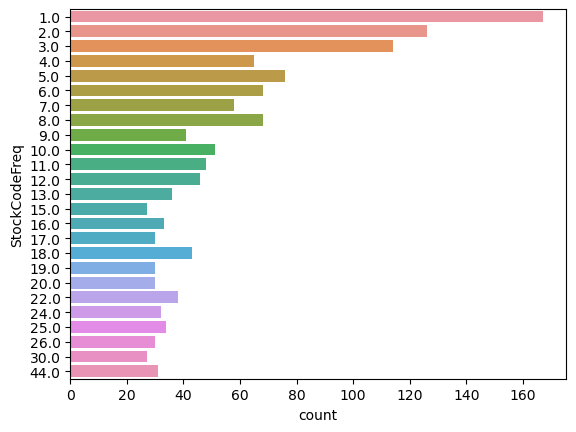

In [56]:
import seaborn as sns

# Get the top 50 StockCodeFreq values
top_25_stock_code_freq = clean_merged_df['StockCodeFreq'].value_counts().nlargest(25).index

# Filter the DataFrame to include only rows with StockCodeFreq in the top 50
top_25_df = clean_merged_df[clean_merged_df['StockCodeFreq'].isin(top_25_stock_code_freq)]

# Bar plot of the top 50 StockCodeFreq values
sns.countplot(y='StockCodeFreq', data=top_25_df)

<Axes: xlabel='count', ylabel='StockCodeFreq'>

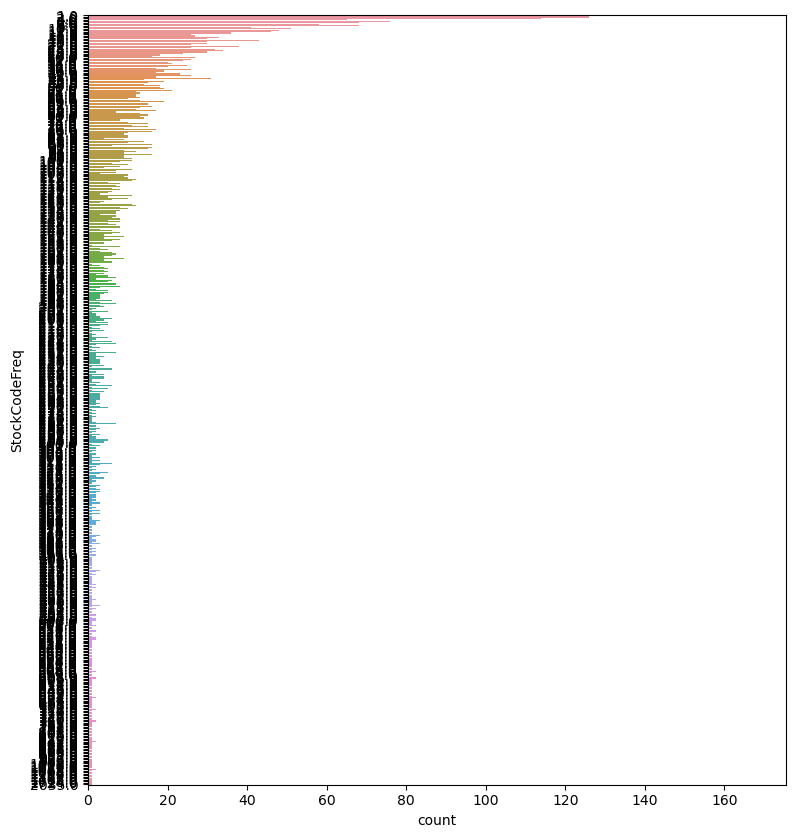

In [53]:
# Make figsize
plt.figure(figsize=(9,10))

# Bar plot by country
sns.countplot(y='StockCodeFreq', data=clean_merged_df)

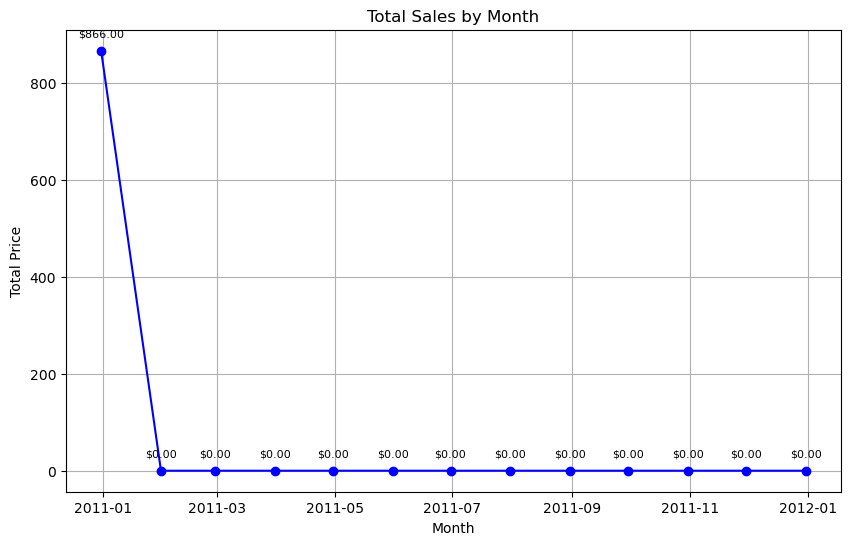

In [48]:
import matplotlib.pyplot as plt
import mplcursors

# Resample data to monthly frequency and sum up 'TotalPrice' for each month
monthly_total_price = clean_merged_df.resample('M', on='InvoiceDate')['TotalPrice'].sum()

# Plot the time series data
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
line = plt.plot(monthly_total_price.index, monthly_total_price, color='blue', marker='o', linestyle='-')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Price')
plt.grid(True)

# Enable hover annotation
mplcursors.cursor(line, hover=True)

# Annotate each point with the total price
for i, price in enumerate(monthly_total_price):
    annotation = f"${price:.2f}"
    plt.annotate(annotation, xy=(monthly_total_price.index[i], price), fontsize=8, textcoords="offset points", xytext=(0,10), ha='center')

plt.show()


In [37]:
# Merge customer_frequency_df with Invoice_frequency_df
#clean_merged_df = pd.merge(customer_frequency_df, Invoicefrequency_df, on='CustomerID', how='left')
clean_merged_df = pd.merge(Invoicefrequency_df, on='CustomerID', how='left')
# Merge StockCode_freq_df with the merged DataFrame
clean_merged_df = pd.merge(clean_merged_df, StockCodefreq_df, on='CustomerID', how='left')

# Merge total_purchase_amount_df with the merged DataFrame
#clean_merged_df = pd.merge(clean_merged_df, total_purchase_amount_df, on='CustomerID', how='left')

# Merge max_purchase_date_df with the merged DataFrame
clean_merged_df = pd.merge(clean_merged_df, filtered_invoice_df, on='CustomerID', how='left')

# Merge recency_df with the merged DataFrame
clean_merged_df = pd.merge(clean_merged_df, recency_df, on='CustomerID', how='left')
# Display the merged dataframe
print(retail_df.head())

TypeError: merge() missing 1 required positional argument: 'right'

In [32]:
# Merge customer_frequency with invoice_frequency on 'CustomerID'
merged_ferquency_df = customer_frequency.merge(Invoicefrequency_df, on='CustomerID', how='inner')

# Merge the result with StockCode_freq on 'CustomerID'
merged_frequency_df = merged_ferquency_df.merge(StockCodefreq_df, on='CustomerID', how='inner')

# Merge the result with totalpurchase_amount on 'CustomerID'
merged_frequency_df = merged_ferquency_df.merge(total_purchase_amount_df, on='CustomerID', how='inner')

# Merge the result with filtered_invoice_date on 'CustomerID'
merged_frequency_df = merged_ferquency_df.merge(filtered_invoice_df, on='CustomerID', how='inner')

# Merge the result with recency on 'CustomerID'
merged_ferquency_df = merged_ferquency_df.merge(recency_df, on='CustomerID', how='inner')

# Display the final merged DataFrame
print(merged_ferquency_df.head())

AttributeError: 'Series' object has no attribute 'merge'

In [35]:
invoice_df = retail_df[['CustomerID', 'InvoiceDate']].copy()
invoice_df['date'] = invoice_df['InvoiceDate'].map(lambda x:str(x).split(' ')[0])
customerId = '15311.0'
filteredinvoice_df = invoice_df.loc[invoice_df['CustomerID']==customerId].drop_duplicates(subset=['date'])

filteredinvoice_df#.dtypes

,CustomerID,InvoiceDate,date
106,15311.0,2010-12-01 09:41:00,2010-12-01
9070,15311.0,2010-12-05 13:55:00,2010-12-05
18007,15311.0,2010-12-08 13:23:00,2010-12-08
21068,15311.0,2010-12-09 14:15:00,2010-12-09
28181,15311.0,2010-12-13 15:07:00,2010-12-13
...,...,...,...
492340,15311.0,2011-11-25 13:52:00,2011-11-25
501316,15311.0,2011-11-29 13:12:00,2011-11-29
511389,15311.0,2011-12-02 13:21:00,2011-12-02
521982,15311.0,2011-12-06 12:59:00,2011-12-06


In [44]:
Invoicedatelist = filteredinvoice_df['InvoiceDate'].tolist()
invoicespans = []
previousdate = None

for i, d in enumerate(Invoicedatelist):
    if i > 0:
        invoicespans.append((d-previousdate).days)
    previousdate = d
sum(invoicespans)/len(invoicespans)    


3.6292134831460676

In [22]:
#determine the number of days since the customer's last purchase
max_purchase_date_df.columns = ['InvoiceDate', 'InvoiceDateFreq']
#max_purchase_date_df['DaysSinceLastPurchase'] = (pd.to_datetime('today') - max_purchase_date['InvoiceDate']).dt.days
max_purchase_date_df

,InvoiceDate,InvoiceDateFreq
0,2011-11-14 15:27:00,542
1,2011-11-28 15:54:00,533
2,2011-12-05 17:17:00,529
3,2011-11-23 13:39:00,443
4,2011-10-31 14:09:00,435
...,...,...
17232,2011-10-26 13:21:00,1
17233,2011-03-17 17:13:00,1
17234,2011-03-17 18:28:00,1
17235,2011-03-17 18:30:00,1


In [ ]:
# Merge customer_frequency_df with Invoice_frequency_df
clean_merged_df = pd.merge(customer_frequency_df, Invoice_frequency_df, on='CustomerID', how='left')

# Merge StockCode_freq_df with the merged DataFrame
clean_merged_df = pd.merge(merged_df, StockCode_freq_df, on='CustomerID', how='left')

# Merge total_purchase_amount_df with the merged DataFrame
clean_merged_df = pd.merge(merged_df, total_purchase_amount_df, on='CustomerID', how='left')

# Merge max_purchase_date_df with the merged DataFrame
clean_merged_df = pd.merge(merged_df, max_purchase_date_df, on='CustomerID', how='left')
# Display the merged dataframe
print(retail_df.head())

In [ ]:
retail_df = pd.DataFrame(retail_df)

# Group the data by CustomerID and StockCode and count occurrences
grouped_df = retail_df.groupby(['CustomerID', 'StockCode']).size().reset_index(name='Frequency')

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(grouped_df['Frequency'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of CustomerID and StockCode Occurrences')
plt.xlabel('Frequency')
plt.ylabel('Number of Occurrences')
plt.grid(True)
plt.show()

In [ ]:
for col in retail_df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=col, bins=10, kde=True)
    plt.title(f'Histogram of {col}')
    
    # Annotating histograms with counts
    for p in plt.gca().patches:
        plt.gca().annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 10), 
                    textcoords='offset points')

# Plot count plots for object columns
for col in retail_df.select_dtypes(include=['object']).columns:
    plt.figure( figsize=(10, 5))
    sns.countplot(data=df, x=col)
    plt.title(f'Count Plot of {col}')
    
    # Annotating count plots with counts
    for p in plt.gca().patches:
        plt.gca().annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 10), 
                    textcoords='offset points')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load sample data into DataFrame
data = {
    'InvoiceNo': ['InvoiceNo'],
    'StockCode': ['StockCode'],
    'Description': ['Description'],
    'Quantity': ['Quantity'],
    'InvoiceDate': ['InvoiceDate'],
    'UnitPrice': ['UnitPrice'],
    'CustomerID': ['CustomerID'],
    'Country': ['Country']
}

df = pd.DataFrame(data)

# Group the data by CustomerID and StockCode and count occurrences
grouped_df = df.groupby(['CustomerID', 'StockCode']).size().reset_index(name='Frequency')

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(grouped_df['Frequency'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of CustomerID and StockCode Occurrences')
plt.xlabel('Frequency')
plt.ylabel('Number of Occurrences')
plt.grid(True)
plt.show()